<a href="https://colab.research.google.com/github/MohamedKhalidmk/MedImageAI/blob/main/Brain_tumor_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from google.colab import files
import zipfile
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import time
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
upload=files.upload() #upload the zip file

Saving Dataset.rar to Dataset.rar


In [ ]:
!apt-get install unrar #installing unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!unrar x Dataset.rar #unzipping


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from Dataset.rar

Creating    Dataset                                                   OK
Creating    Dataset/Brain Tumor Data Set                              OK
Creating    Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy      OK
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (1).jpeg       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (1).jpg       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (1).png       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (10).jpg       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (100).jpg       0%  OK 
Extracting  Dataset/Brain Tumor Data Set/Grayscale_Brain_Healthy/Not Cancer  (1000).jpg       0%  OK 
Extracting  Dataset/B

In [ ]:
print(os.listdir("Dataset")) #open dataset

['Brain Tumor Data Set']


In [ ]:
path = "Dataset/Brain Tumor Data Set"
dataset = tf.keras.utils.image_dataset_from_directory(
    path,
    labels='inferred',   #based on the folder name
    label_mode='binary',
    image_size=(224, 224),
    batch_size=32
)
class_names = dataset.class_names
dataset=dataset.shuffle(1000) #shuffle
train_batches = int(0.7 * len(dataset))          #training set 70%
test_batches = len(dataset) - train_batches      #testing set 30%

training = dataset.take(train_batches)
testing = dataset.skip(train_batches)
print(len(training))
print(len(testing))

Found 4514 files belonging to 2 classes.
99
43


['Grayscale_Brain_Healthy', 'Grayscale_Brain_Tumor']


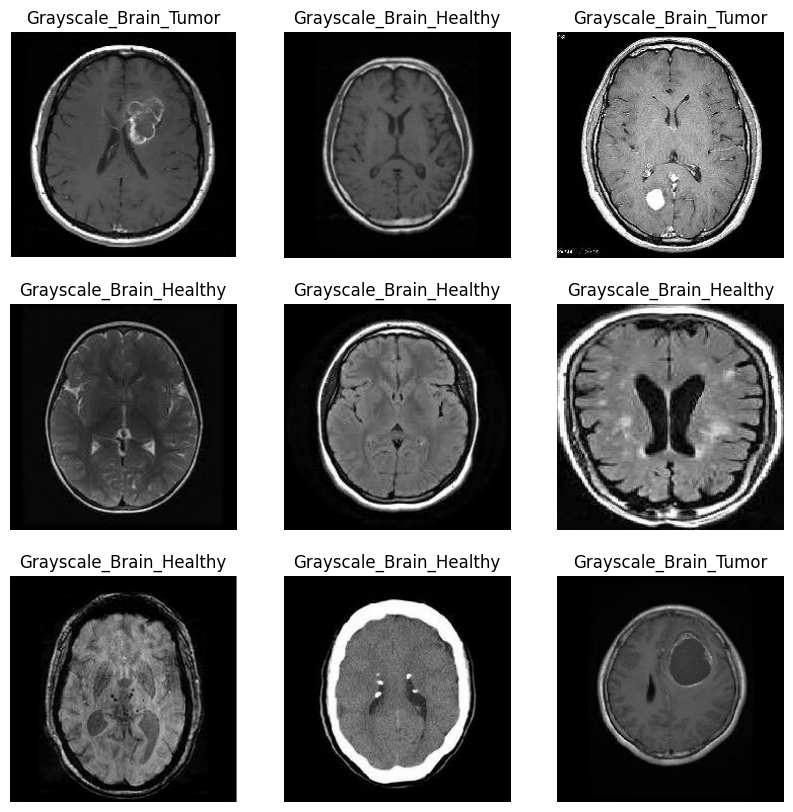

In [ ]:
print(class_names)                     #print a sample of the training dataset
plt.figure(figsize=(10, 10))
for images, labels in training.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label=class_names[int(labels[i])]
    plt.title(label)
    plt.axis("off")
plt.show()


In [ ]:
def dataset_to_numpy(dataset):      #convert datset to numpy type for PCA later
    images=[]
    labels=[]
    for image,label in dataset:
       images.append(image.numpy())
       labels.append(label.numpy())
    images=np.concatenate(images,axis=0)
    labels=np.concatenate(labels,axis=0)
    return images,labels

In [ ]:
X_train,Y_train=dataset_to_numpy(training)
X_test,Y_test=dataset_to_numpy(testing)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3138, 224, 224, 3)
(3138, 1)
(1376, 224, 224, 3)
(1376, 1)


In [ ]:
X_train=X_train.reshape(X_train.shape[0],-1)        #flatten for PCA
X_test=X_test.reshape(X_test.shape[0],-1)
print(X_train.shape)
print(X_test.shape)

(3138, 150528)
(1376, 150528)


In [ ]:
scalar=StandardScaler()              #scale for better PCAreduction
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
pca=PCA(n_components=100)                #applying PCA
training=pca.fit_transform(X_train)
testing=pca.transform(X_test)
print(training.shape)
print(testing.shape)

(3138, 100)
(1376, 100)


In [ ]:
k_values=[1,3,5,7]
print("KNN\n" + "-"*30)                         #applying KNN
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  start_time=time.time()
  knn.fit(training,Y_train.ravel())
  end_time=time.time()
  y_pred=knn.predict(testing)
  accuracy = accuracy_score(Y_test, y_pred)
  elapsed_time=end_time-start_time
  print(f"K = {k}")
  print(f"  ➤ Accuracy      : {accuracy:.4f}")
  print(f"  ➤ Train Time    : {elapsed_time:.7f} seconds\n")

KNN
------------------------------
K = 1
  ➤ Accuracy      : 0.9859
  ➤ Train Time    : 0.0020287 seconds

K = 3
  ➤ Accuracy      : 0.9651
  ➤ Train Time    : 0.0012543 seconds

K = 5
  ➤ Accuracy      : 0.9279
  ➤ Train Time    : 0.0013218 seconds

K = 7
  ➤ Accuracy      : 0.9131
  ➤ Train Time    : 0.0015357 seconds



In [ ]:
dt=DecisionTreeClassifier()                      #applying Decision Tree
start_time=time.time()
dt.fit(training,Y_train.ravel())
end_time=time.time()
y_pred=dt.predict(testing)
elapsed_time=end_time-start_time
accuracy=accuracy_score(Y_test,y_pred)
print("Decision Tree Classification\n" + "-"*30)
print(f"  ➤ Accuracy      : {accuracy:.4f}")
print(f"  ➤ Train Time    : {elapsed_time:.7f} seconds\n")

Decision Tree Classification
------------------------------
  ➤ Accuracy      : 0.9703
  ➤ Train Time    : 0.5118947 seconds



In [ ]:
#applying SVM,max_iter for faster training
svm=SVC(kernel='linear',max_iter=100000,verbose=True)
start_time=time.time()
svm.fit(training,Y_train.ravel())
end_time=time.time()
y_pred=svm.predict(testing)
elapsed_time=end_time-start_time
accuracy=accuracy_score(Y_test,y_pred)
print("SVM Classification\n" + "-"*30)
print(f"  ➤ Accuracy      : {accuracy:.4f}")
print(f"  ➤ Train Time    : {elapsed_time:.7f} seconds\n")
print(f"  ➤ Support Vectors: {len(svm.support_vectors_)}")

[LibSVM]SVM Classification
------------------------------
  ➤ Accuracy      : 0.5981
  ➤ Train Time    : 2.9617937 seconds

  ➤ Support Vectors: 2226


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**ELBOW** **METHOD** to find good value for the eps parameter in DBSCAN.

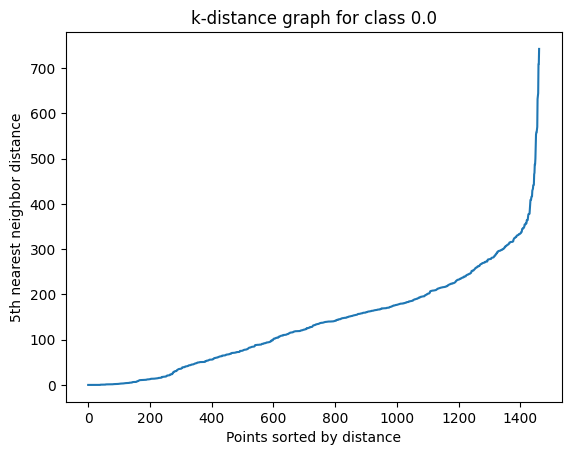

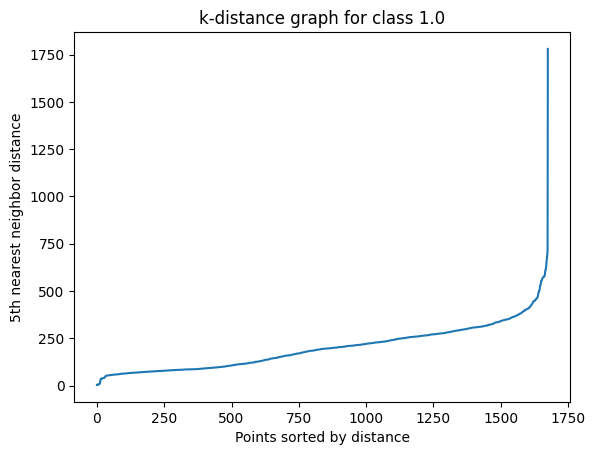

In [ ]:
unique_classes = np.unique(Y_train.ravel())
for class_label in unique_classes:
    X_class = training[Y_train.ravel() == class_label]

    neigh = NearestNeighbors(n_neighbors=5)  # min_samples = 5
    nbrs = neigh.fit(X_class)
    distances, _ = nbrs.kneighbors(X_class)

    # Sort distances to the 5th nearest neighbor (index 4 because zero-based)
    dist_sorted = np.sort(distances[:, 4])

    plt.figure()
    plt.plot(dist_sorted)
    plt.title(f'k-distance graph for class {class_label}')
    plt.xlabel('Points sorted by distance')
    plt.ylabel('5th nearest neighbor distance')
    plt.show()

In [ ]:
unique_classes = np.unique(Y_train)
border_points = []
border_labels = []

for class_label in unique_classes:
    # Select samples of the current class
    X_class = training[Y_train.ravel() == class_label]

    # Fit DBSCAN on this class subset
    dbscan = DBSCAN(eps=300, min_samples=55)  # eps,min_samples

    dbscan.fit(X_class)

    core_sample_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_sample_mask[dbscan.core_sample_indices_] = True

    border_mask = (dbscan.labels_ != -1) & (~core_sample_mask)

    print(f"Class {class_label}:")
    print(f"  Total points: {len(X_class)}")
    print(f"  Core points: {np.sum(core_sample_mask)}")
    print(f"  Border points: {np.sum(border_mask)}")
    print(f"  Noise points: {np.sum(dbscan.labels_ == -1)}")

    # Collect border points and labels for all classes
    border_points.append(X_class[border_mask])
    border_labels.append(np.full(np.sum(border_mask), class_label))

# Concatenate border points and labels from all classes
if border_points:
    X_border = np.concatenate(border_points, axis=0)
    Y_border = np.concatenate(border_labels, axis=0)
else:
    X_border = np.array([])
    Y_border = np.array([])

print("Border points shape:", X_border.shape)
print("Border labels shape:", Y_border.shape)

Class 0.0:
  Total points: 1473
  Core points: 993
  Border points: 275
  Noise points: 205
Class 1.0:
  Total points: 1665
  Core points: 1045
  Border points: 250
  Noise points: 370
Border points shape: (525, 100)
Border labels shape: (525,)


In [ ]:
k_values=[1,3,5,7]
print("KNN\n" + "-"*30)                        #applying KNN on reduced data
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  start_time=time.time()
  knn.fit(X_border,Y_border.ravel())
  end_time=time.time()
  y_pred=knn.predict(testing)
  accuracy = accuracy_score(Y_test, y_pred)
  elapsed_time=end_time-start_time
  print(f"K = {k}")
  print(f"  ➤ Accuracy      : {accuracy:.4f}")
  print(f"  ➤ Train Time    : {elapsed_time:.7f} seconds\n")

KNN
------------------------------
K = 1
  ➤ Accuracy      : 0.5894
  ➤ Train Time    : 0.0023859 seconds

K = 3
  ➤ Accuracy      : 0.5501
  ➤ Train Time    : 0.0007851 seconds

K = 5
  ➤ Accuracy      : 0.5719
  ➤ Train Time    : 0.0007606 seconds

K = 7
  ➤ Accuracy      : 0.5676
  ➤ Train Time    : 0.0010471 seconds



In [ ]:
dt=DecisionTreeClassifier()             #applying Decision Tree on reduced data
start_time=time.time()
dt.fit(X_border,Y_border.ravel())
end_time=time.time()
y_pred=dt.predict(testing)
elapsed_time=end_time-start_time
accuracy=accuracy_score(Y_test,y_pred)
print("Decision Tree Classification\n" + "-"*30)
print(f"  ➤ Accuracy      : {accuracy:.4f}")
print(f"  ➤ Train Time    : {elapsed_time:.7f} seconds\n")

Decision Tree Classification
------------------------------
  ➤ Accuracy      : 0.6701
  ➤ Train Time    : 0.0649445 seconds



In [ ]:
#applying SVM on reduced data
svm=SVC(kernel='linear',max_iter=100000,verbose=True)
start_time=time.time()
svm.fit(X_border,Y_border.ravel())
end_time=time.time()
y_pred=svm.predict(testing)
elapsed_time=end_time-start_time
accuracy=accuracy_score(Y_test,y_pred)
print("SVM Classification\n" + "-"*30)
print(f"  ➤ Accuracy      : {accuracy:.4f}")
print(f"  ➤ Train Time    : {elapsed_time:.7f} seconds\n")
print(f"  ➤ Support Vectors: {len(svm.support_vectors_)}")

[LibSVM]SVM Classification
------------------------------
  ➤ Accuracy      : 0.5669
  ➤ Train Time    : 0.5337350 seconds

  ➤ Support Vectors: 400


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
classifiers = {                                      #All classifiers
    "KNN_1": KNeighborsClassifier(n_neighbors=1),
    "KNN_3": KNeighborsClassifier(n_neighbors=3),
    "KNN_5": KNeighborsClassifier(n_neighbors=5),
    "KNN_7": KNeighborsClassifier(n_neighbors=7),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(max_iter=100000)
}

In [ ]:
print("\nClassifier Evaluation Results\n" + "="*35)
dimensions = range(10, 101, 10)
results = []

for n_components in dimensions:
    # Apply PCA with n_components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f"\n\n=== PCA with {n_components} Eigen vectors ===")
    for name, clf in classifiers.items():
          start_time = time.time()
          clf.fit(training, Y_train.ravel())
          end_time = time.time()

          y_pred = clf.predict(testing)
          accuracy = accuracy_score(Y_test, y_pred)
          elapsed_time = end_time - start_time

          print(f"\n{name} Classification")
          print("-" * (len(name) + 15))
          print(f"  ➤ Accuracy      : {accuracy:.4f}")
          print(f"  ➤ Train Time    : {elapsed_time:.7f} seconds")

          # Print support vectors count for SVM
          if name == "SVM":
           print(f"  ➤ Support Vectors: {len(clf.support_)}")
          results.append({"classifier": name,
                         "accuracy": accuracy,
                         "train_time": elapsed_time,
                         "n_components": n_components})
#find best result and dim
best_results = max(results, key=lambda x: x["accuracy"])
print("\n\n=== Best Result ===")
print(f"Classifier       : {best_results['classifier']}")
print(f"Eigen Vectors    : {best_results['n_components']}")
print(f"Accuracy         : {best_results['accuracy']:.4f}")
print(f"Training Time    : {best_results['train_time']:.7f} seconds")


Classifier Evaluation Results


=== PCA with 10 Eigen vectors ===

KNN_1 Classification
--------------------
  ➤ Accuracy      : 0.9876
  ➤ Train Time    : 0.0021789 seconds

KNN_3 Classification
--------------------
  ➤ Accuracy      : 0.9593
  ➤ Train Time    : 0.0016906 seconds

KNN_5 Classification
--------------------
  ➤ Accuracy      : 0.9404
  ➤ Train Time    : 0.0013511 seconds

KNN_7 Classification
--------------------
  ➤ Accuracy      : 0.9281
  ➤ Train Time    : 0.0014014 seconds

DecisionTree Classification
---------------------------
  ➤ Accuracy      : 0.9738
  ➤ Train Time    : 0.5087898 seconds

SVM Classification
------------------
  ➤ Accuracy      : 0.9419
  ➤ Train Time    : 0.5086215 seconds
  ➤ Support Vectors: 1587


=== PCA with 20 Eigen vectors ===

KNN_1 Classification
--------------------
  ➤ Accuracy      : 0.9876
  ➤ Train Time    : 0.0019994 seconds

KNN_3 Classification
--------------------
  ➤ Accuracy      : 0.9593
  ➤ Train Time    : 0.0017264 secon